<a href="https://colab.research.google.com/github/socloseeee/Magistracy_DSTU_1ST_COURSE/blob/main/%D0%92%D1%82%D0%BE%D1%80%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import scipy.stats as stats

# Загрузка данных из Excel файла
from scipy.stats import chi2

In [4]:
file_path = "assets/Statistika_V_Excel.xlsx"
students = pd.read_excel(file_path, skiprows=4)


# Выделение выборок
group_1 = students["Гр1.9"]
group_2 = students["Гр2.9"]

In [5]:
# Описательная статистика для группы 1
print("Группа 1:")
print("Размах:", np.ptp(group_1))
print("Минимальное значение:", np.min(group_1))
print("Максимальное значение:", np.max(group_1))
print("Выборочное среднее:", np.mean(group_1))
print("Выборочная дисперсия:", np.var(group_1))
print("Коэффициент вариации:", np.std(group_1) / np.mean(group_1))
print("Ассиметрия:", stats.skew(group_1))
print("Эксцесс:", stats.kurtosis(group_1))

Группа 1:
Размах: 19
Минимальное значение: 8
Максимальное значение: 27
Выборочное среднее: 16.566666666666666
Выборочная дисперсия: 22.045555555555556
Коэффициент вариации: 0.28341666923542735
Ассиметрия: 0.13435690138678857
Эксцесс: -0.6282910836630275


In [5]:
# Описательная статистика для группы 2
print("\nГруппа 2:")
print("Размах:", np.ptp(group_2))
print("Минимальное значение:", np.min(group_2))
print("Максимальное значение:", np.max(group_2))
print("Выборочное среднее:", np.mean(group_2))
print("Выборочная дисперсия:", np.var(group_2))
print("Коэффициент вариации:", np.std(group_2) / np.mean(group_2))
print("Ассиметрия:", stats.skew(group_2))
print("Эксцесс:", stats.kurtosis(group_2))


Группа 2:
Размах: 18
Минимальное значение: 6
Максимальное значение: 24
Выборочное среднее: 15.366666666666667
Выборочная дисперсия: 16.63222222222222
Коэффициент вариации: 0.26539666966093817
Ассиметрия: 0.1860802190762622
Эксцесс: -0.016891372193472254


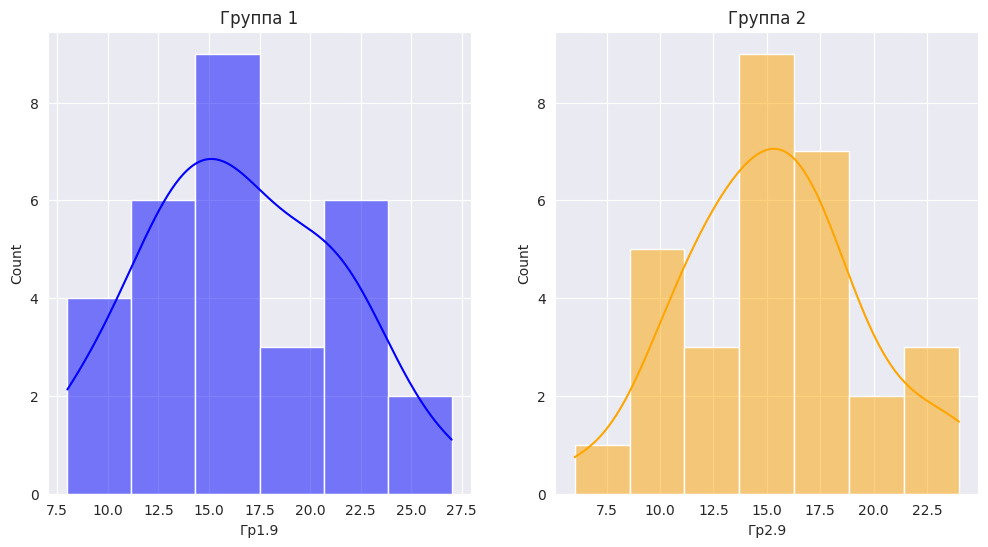

In [5]:
# Гистограммы
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(group_1, kde=True, color='blue')
plt.title('Группа 1')

plt.subplot(1, 2, 2)
sns.histplot(group_2, kde=True, color='orange')
plt.title('Группа 2')
# plt.savefig('results/2_Students/Гистограмма.png')
plt.show()

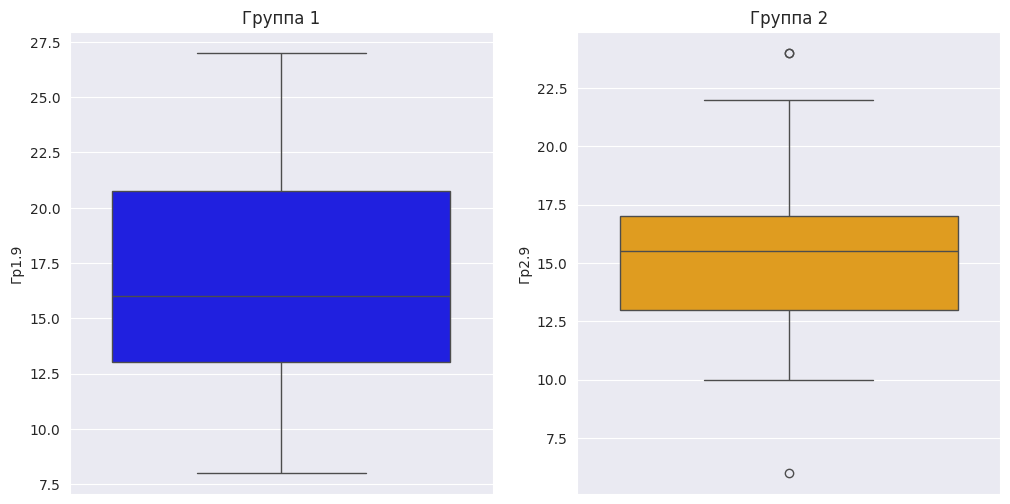

In [6]:
# Диаграммы ящик с усами
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=group_1, color='blue')
plt.title('Группа 1')

plt.subplot(1, 2, 2)
sns.boxplot(y=group_2, color='orange')
plt.title('Группа 2')
# plt.savefig('results/2_Students/Ящик_с_усами.png')
plt.show()

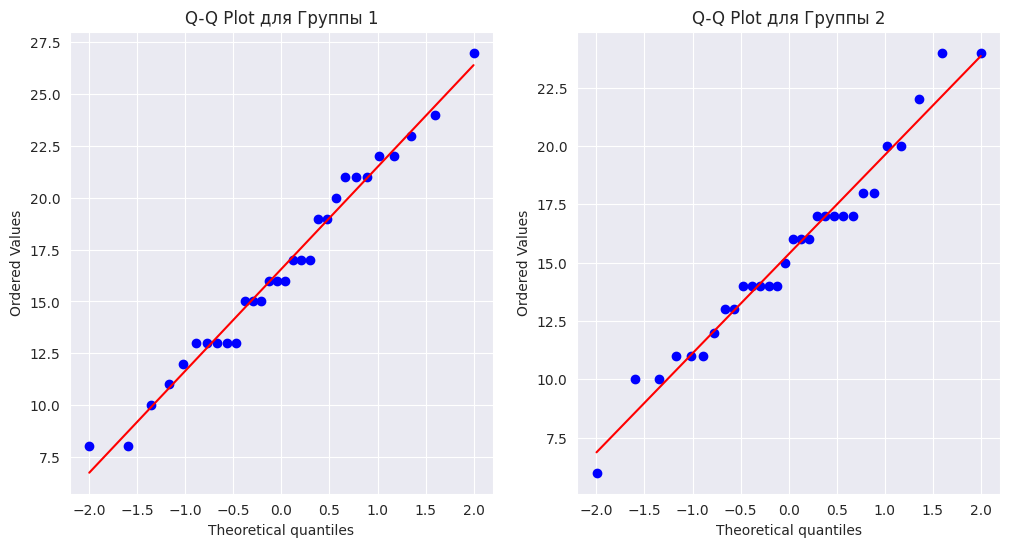

In [7]:
# Графики Q-Q Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(group_1, dist="norm", plot=plt)
plt.title('Q-Q Plot для Группы 1')

plt.subplot(1, 2, 2)
stats.probplot(group_2, dist="norm", plot=plt)
plt.title('Q-Q Plot для Группы 2')
# plt.savefig('results/2_Students/Q-Q_Plot.png')
plt.show()

In [6]:
# Описание основной гипотезы:
# Нулевая гипотеза (H0): Распределение в группе 1 является нормальным.
# Нулевая гипотеза (H0): Распределение в группе 2 является нормальным.

# Описание альтернативной гипотезы:
# Альтернативная гипотеза (H1): Распределение в группе 1 не является нормальным.
# Альтернативная гипотеза (H1): Распределение в группе 2 не является нормальным.

_, p_value1 = stats.shapiro(group_1)
_, p_value2 = stats.shapiro(group_2)

print("\nShapiro-Wilk тест:")
print("Группа 1 p-значение:", p_value1)
print("Группа 2 p-значение:", p_value2)

# Доверительные интервалы для математического ожидания и дисперсии
confidence_level = 0.95

# Группа 1
desc_group_1 = sm.stats.DescrStatsW(group_1)
ci_mean_group_1 = desc_group_1.tconfint_mean(alpha=confidence_level)
var_group_1 = desc_group_1.var
df_group_1 = len(group_1) - 1
ci_var_group_1 = (df_group_1 * var_group_1 / chi2.ppf((1 + confidence_level) / 2, df_group_1),
                  df_group_1 * var_group_1 / chi2.ppf((1 - confidence_level) / 2, df_group_1))

# Группа 2
desc_group_2 = sm.stats.DescrStatsW(group_2)
ci_mean_group_2 = desc_group_2.tconfint_mean(alpha=confidence_level)
var_group_2 = desc_group_2.var
df_group_2 = len(group_2) - 1
ci_var_group_2 = (df_group_2 * var_group_2 / chi2.ppf((1 + confidence_level) / 2, df_group_2),
                  df_group_2 * var_group_2 / chi2.ppf((1 - confidence_level) / 2, df_group_2))

print("\nДоверительные интервалы для математического ожидания:")
print("Группа 1:", ci_mean_group_1)
print("Группа 2:", ci_mean_group_2)

print("\nДоверительные интервалы для дисперсии:")
print("Группа 1: Дисперсия =", var_group_1, "Интервал =", ci_var_group_1)
print("Группа 2: Дисперсия =", var_group_2, "Интервал =", ci_var_group_2)

# Проверка существенных различий между группами
_, p_value_ttest = stats.ttest_ind(group_1, group_2)
print("\nT-тест для сравнения средних:")
print("p-значение:", p_value_ttest)

alpha = 0.05
if p_value_ttest < alpha:
    print("Отвергаем нулевую гипотезу: существуют существенные различия между группами.")
else:
    print("Нет достаточных доказательств для отвержения нулевой гипотезы.")

# Дополнительно можно использовать другие тесты, например, Mann-Whitney U test для непараметрического сравнения
_, p_value_mw = stats.mannwhitneyu(group_1, group_2)
print("\nMann-Whitney U тест:")
print("p-значение:", p_value_mw)

if p_value_mw < alpha:
    print("Отвергаем нулевую гипотезу: существуют существенные различия между группами.")
else:
    print("Нет достаточных доказательств для отвержения нулевой гипотезы.")

# Создание DataFrame с описательной статистикой
data = {
    'Группа': ['Группа 1', 'Группа 2'],
    'Размах': [np.ptp(group_1), np.ptp(group_2)],
    'Минимальное значение': [np.min(group_1), np.min(group_2)],
    'Максимальное значение': [np.max(group_1), np.max(group_2)],
    'Выборочное среднее': [np.mean(group_1), np.mean(group_2)],
    'Выборочная дисперсия': [np.var(group_1), np.var(group_2)],
    'Коэффициент вариации': [np.std(group_1) / np.mean(group_1), np.std(group_2) / np.mean(group_2)],
    'Ассиметрия': [stats.skew(group_1), stats.skew(group_2)],
    'Эксцесс': [stats.kurtosis(group_1), stats.kurtosis(group_2)],
    'Shapiro-Wilk тест p-значение': [p_value1, p_value2],
    'Доверительный интервал для среднего': [ci_mean_group_1, ci_mean_group_2],
    'Доверительный интервал для дисперсии': [ci_var_group_1, ci_var_group_2],
    'T-тест p-значение': [p_value_ttest, None],
    'Mann-Whitney U тест p-значение': [p_value_mw, None]
}

df = pd.DataFrame(data)
# df.to_excel("results/2_Students/students.xlsx", index=False)


Shapiro-Wilk тест:
Группа 1 p-значение: 0.7667914032936096
Группа 2 p-значение: 0.638001561164856

Доверительные интервалы для математического ожидания:
Группа 1: (16.511518113779562, 16.62181521955377)
Группа 2: (15.318765208213158, 15.414568125120176)

Доверительные интервалы для дисперсии:
Группа 1: Дисперсия = 22.04555555555556 Интервал = (13.982702305157723, 39.840359864272)
Группа 2: Дисперсия = 16.632222222222225 Интервал = (10.549219838007456, 30.05747426078764)

T-тест для сравнения средних:
p-значение: 0.30307940186817833
Нет достаточных доказательств для отвержения нулевой гипотезы.

Mann-Whitney U тест:
p-значение: 0.38959165453404343
Нет достаточных доказательств для отвержения нулевой гипотезы.


### Поскольку p-значение нашего теста (0.30307940186817833) больше, чем альфа = 0,05, мы не можем отвергнуть нулевую гипотезу теста.

# Новый раздел